In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sys

def print_fl(output):
    print(output)
    sys.stdout.flush()

def get_raw_filename(sim_id, num_pol, T, F):
    return "../perm-sim-id-%s-numpol-%d-T-%.2f-F-%.2f.npz" % (sim_id, num_pol, T, F)

def get_summary_filename(sim_id, num_pol, T, F):
    return "../summaries/perm-summary-%s-numpol-%d-T-%.2f-F-%.2f.npz" % (sim_id, num_pol, T, F)

def calculate_weighted_stddevs(qty, ws, n, axis=0):
    avg_qty = np.average(qty, axis=axis, weights=ws)
    dsq_qty = (qty - avg_qty)**2
    var_qty = np.average(dsq_qty, axis=axis, weights=ws)
    return np.sqrt(var_qty / n)

In [2]:
Ts = np.linspace(0.2, 6.0, 30)
Fs = np.concatenate((np.linspace(0.0, 0.1, 11), np.linspace(0.2, 1.0, 9)))

In [10]:
def transcribe_summaries(sim_id_in, sim_id_out, num_pol, Ts, Fs):
    for F in Fs:
        for T in Ts:
            print_fl("Processing T: %.2f\t F: %.2f" % (T, F))
            with np.load(get_raw_filename(sim_id_in, num_pol, T, F)) as rawData:
                sumData = dict()
                sumData["pol_weight_renormalization"] = rawData["pol_weight_renormalization"]
                sumData["epsilon"] = rawData["epsilon"]
                sumData["n_theta"] = rawData["n_theta"]
                sumData["sigma"] = rawData["sigma"]
                sumData["enable_LJ_interaction"] = rawData["enable_LJ_interaction"]
                sumData["n_dim"] = rawData["n_dim"]
                sumData["F"] = rawData["F"]
                sumData["n"] = rawData["n"]
                sumData["T"] = rawData["T"]
                sumData["F"] = rawData["F"]
                sumData["max_size"] = rawData["max_size"]
                sumData["d"] = rawData["d"]

                #sumData["r_end"] = rawData["r_end"]
                sumData["final_weights"] = rawData["pol_weights"][:,-1]

                sumData["x_e2e"] = np.average(rawData["r_end"][:,:,0], axis=0, weights=rawData["pol_weights"])
                sumData["y_e2e"] = np.average(rawData["r_end"][:,:,1], axis=0, weights=rawData["pol_weights"])

                sumData["x_e2e_sd"] = calculate_weighted_stddevs(rawData["r_end"][:,:,0], rawData["pol_weights"], num_pol)
                sumData["y_e2e_sd"] = calculate_weighted_stddevs(rawData["r_end"][:,:,1], rawData["pol_weights"], num_pol)

                sumData["r_e2e"] = np.average(rawData["r_e2e"], axis=0, weights=rawData["pol_weights"])
                sumData["r_gyration"] = np.average(rawData["r_gyration"], axis=0, weights=rawData["pol_weights"])
                sumData["energies"] = np.average(rawData["energies"], axis=0, weights=rawData["pol_weights"])

                sumData["r_e2e_sd"] = calculate_weighted_stddevs(rawData["r_e2e"], rawData["pol_weights"], num_pol)
                sumData["r_gyration_sd"] = calculate_weighted_stddevs(rawData["r_gyration"], rawData["pol_weights"], num_pol)
                sumData["energies_sd"] = calculate_weighted_stddevs(rawData["energies"], rawData["pol_weights"], num_pol)

                np.savez(get_summary_filename(sim_id_out, num_pol, T, F), **sumData)

In [13]:
#Tin = np.array([0.08])
#Fin = np.concatenate((np.linspace(0.0, 0.1, 11), np.linspace(0.2, 1.0, 9), np.linspace(1.25, 3.50, 10)))

Tin = np.array([0.2, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
Fin = np.linspace(4.0, 8.0, 9)

transcribe_summaries("jfcont", "jsaw10k", 10000, Tin, Fin)

Processing T: 0.20	 F: 4.00
Processing T: 1.00	 F: 4.00
Processing T: 2.00	 F: 4.00
Processing T: 3.00	 F: 4.00
Processing T: 4.00	 F: 4.00
Processing T: 5.00	 F: 4.00
Processing T: 6.00	 F: 4.00
Processing T: 0.20	 F: 4.50
Processing T: 1.00	 F: 4.50
Processing T: 2.00	 F: 4.50
Processing T: 3.00	 F: 4.50
Processing T: 4.00	 F: 4.50
Processing T: 5.00	 F: 4.50
Processing T: 6.00	 F: 4.50
Processing T: 0.20	 F: 5.00
Processing T: 1.00	 F: 5.00
Processing T: 2.00	 F: 5.00
Processing T: 3.00	 F: 5.00
Processing T: 4.00	 F: 5.00
Processing T: 5.00	 F: 5.00
Processing T: 6.00	 F: 5.00
Processing T: 0.20	 F: 5.50
Processing T: 1.00	 F: 5.50
Processing T: 2.00	 F: 5.50
Processing T: 3.00	 F: 5.50
Processing T: 4.00	 F: 5.50
Processing T: 5.00	 F: 5.50
Processing T: 6.00	 F: 5.50
Processing T: 0.20	 F: 6.00
Processing T: 1.00	 F: 6.00
Processing T: 2.00	 F: 6.00
Processing T: 3.00	 F: 6.00
Processing T: 4.00	 F: 6.00
Processing T: 5.00	 F: 6.00
Processing T: 6.00	 F: 6.00
Processing T: 0.20	 

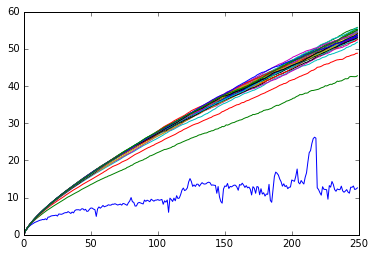

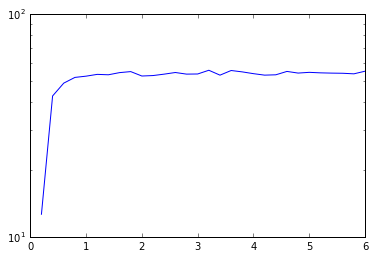

In [5]:
F = 0.0
sim_id = "jsaw10k"
num_pol = 10000

T_data = np.zeros((len(Ts)))

i = 0
for T in Ts:
    with np.load(get_summary_filename(sim_id, num_pol, T, F)) as data:
        r_e2e = data["r_e2e"]
        plt.plot(r_e2e)
        T_data[i] = r_e2e[-1]
    i += 1
    
plt.figure()
plt.plot(Ts, T_data)
plt.yscale('log')
plt.show()

In [6]:
a.keys()

NameError: name 'a' is not defined

In [7]:
avg_e2e = np.average(a["r_e2e"], axis=0, weights=a["pol_weights"])
bd = np.arange(250)
avg_e2e.shape

NameError: name 'a' is not defined

In [ ]:
plt.plot(avg_e2e)

In [ ]:
a["energies"].shape

In [ ]:
a["n"]

In [ ]:
a["r_end"].shape